# ConvNext_BS MASKED HSN

In [2]:
from uncertainbird.utils.misc import (
    load_dump,
    prediction_statistics,
    print_classwise_statistics,
)

predictions, targets, metadata = load_dump(
    "/workspace/projects/uncertainbird/notebooks/reliability-plots/masked_test_predictions_20250827_085344.pkl"
)
stats = prediction_statistics(predictions, print_stats=True)
print_classwise_statistics(predictions, targets)

Loaded data with 12000 samples
Predictions shape: torch.Size([12000, 21])
Targets shape: torch.Size([12000, 21])
Model info: {'class_name': 'MultilabelModule', 'task': 'multilabel', 'num_classes': None}
Save logits: True
Predictions - mean: 0.0022, std: 0.0322, min: 0.0000, max: 0.9990
Class 0: mean: 0.0003, std: 0.0043, min: 0.0000, max: 0.1754, positive samples: 671
Class 1: mean: 0.0192, std: 0.1015, min: 0.0000, max: 0.9917, positive samples: 2676
Class 2: mean: 0.0019, std: 0.0241, min: 0.0000, max: 0.9829, positive samples: 1082
Class 3: mean: 0.0010, std: 0.0209, min: 0.0000, max: 0.9966, positive samples: 22
Class 4: mean: 0.0009, std: 0.0186, min: 0.0000, max: 0.9805, positive samples: 735
Class 5: mean: 0.0001, std: 0.0010, min: 0.0000, max: 0.0883, positive samples: 1
Class 6: mean: 0.0017, std: 0.0246, min: 0.0000, max: 0.9004, positive samples: 175
Class 7: mean: 0.0004, std: 0.0016, min: 0.0000, max: 0.0869, positive samples: 28
Class 8: mean: 0.0082, std: 0.0703, min: 0.

In [3]:
from uncertainbird.modules.metrics.uncertainty import multilabel_calibration_error

print(
    f"Marginal ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='marginal').item():.4f}"
)
print(
    f"MCE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='marginal', norm='max').item():.4f}"
)
print(
    f"Weighted ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='weighted').item():.4f}"
)
print(
    f"Global ECE: {multilabel_calibration_error(predictions, targets, n_bins=10, multilabel_average='global', norm='l1').item():.4f}"
)

Marginal ECE: 0.0229
MCE: 0.6144
Weighted ECE: 0.1179
Global ECE: 0.0226


In [33]:
from torchmetrics.classification import (
    MultilabelAccuracy,
    MultilabelPrecision,
    MultilabelRecall,
    MultilabelF1Score,
    MultilabelAUROC,
)
from birdset.modules.metrics import cmAP
from uncertainbird.modules.metrics.uncertainty import (
    MultilabelCalibrationError,
    TopKMultiLabelCalibrationError,
)

accuracy = MultilabelAccuracy(num_labels=21)(predictions, targets)
cmAP_metric = cmAP(num_labels=21)(predictions, targets)
precision = MultilabelPrecision(num_labels=21)(predictions, targets)
recall = MultilabelRecall(num_labels=21)(predictions, targets)
f1 = MultilabelF1Score(num_labels=21)(predictions, targets)
auroc = MultilabelAUROC(num_labels=21)(predictions, targets)
ece = MultilabelCalibrationError(n_bins=10)(predictions, targets)

criterion = "target class"  # "probability"  # "predicted class"  # "target class"
ece_3 = TopKMultiLabelCalibrationError(k=3, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_5 = TopKMultiLabelCalibrationError(k=5, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_10 = TopKMultiLabelCalibrationError(k=10, n_bins=10, criterion=criterion)(
    predictions, targets
)
ece_21 = TopKMultiLabelCalibrationError(k=21, n_bins=10, criterion=criterion)(
    predictions, targets
)

print("Accuracy:", accuracy)
print("cmAP:", cmAP_metric)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)
print("ECE:", ece)
print("ECE Top-3:", ece_3)
print("ECE Top-5:", ece_5)
print("ECE Top-10:", ece_10)
print("ECE Top-21:", ece_21)
# print("ACE:", ace)

Accuracy: tensor(0.9765)
cmAP: tensor(0.4875)
Precision: tensor(0.5829)
Recall: tensor(0.0830)
F1 Score: tensor(0.1346)
AUROC: tensor(0.8886)
ECE: tensor(0.0229)
ECE Top-3: tensor(0.1175)
ECE Top-5: tensor(0.0854)
ECE Top-10: tensor(0.0473)
ECE Top-21: tensor(0.0229)


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

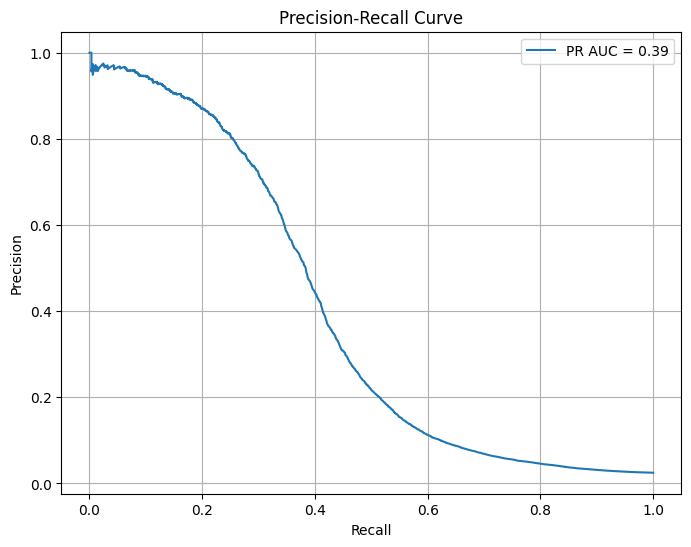

In [24]:
from uncertainbird.utils.plotting import plot_pr_curve

plot_pr_curve(predictions, targets)

<Axes: title={'center': 'Precision-Recall Curve per Class'}, xlabel='Recall', ylabel='Precision'>

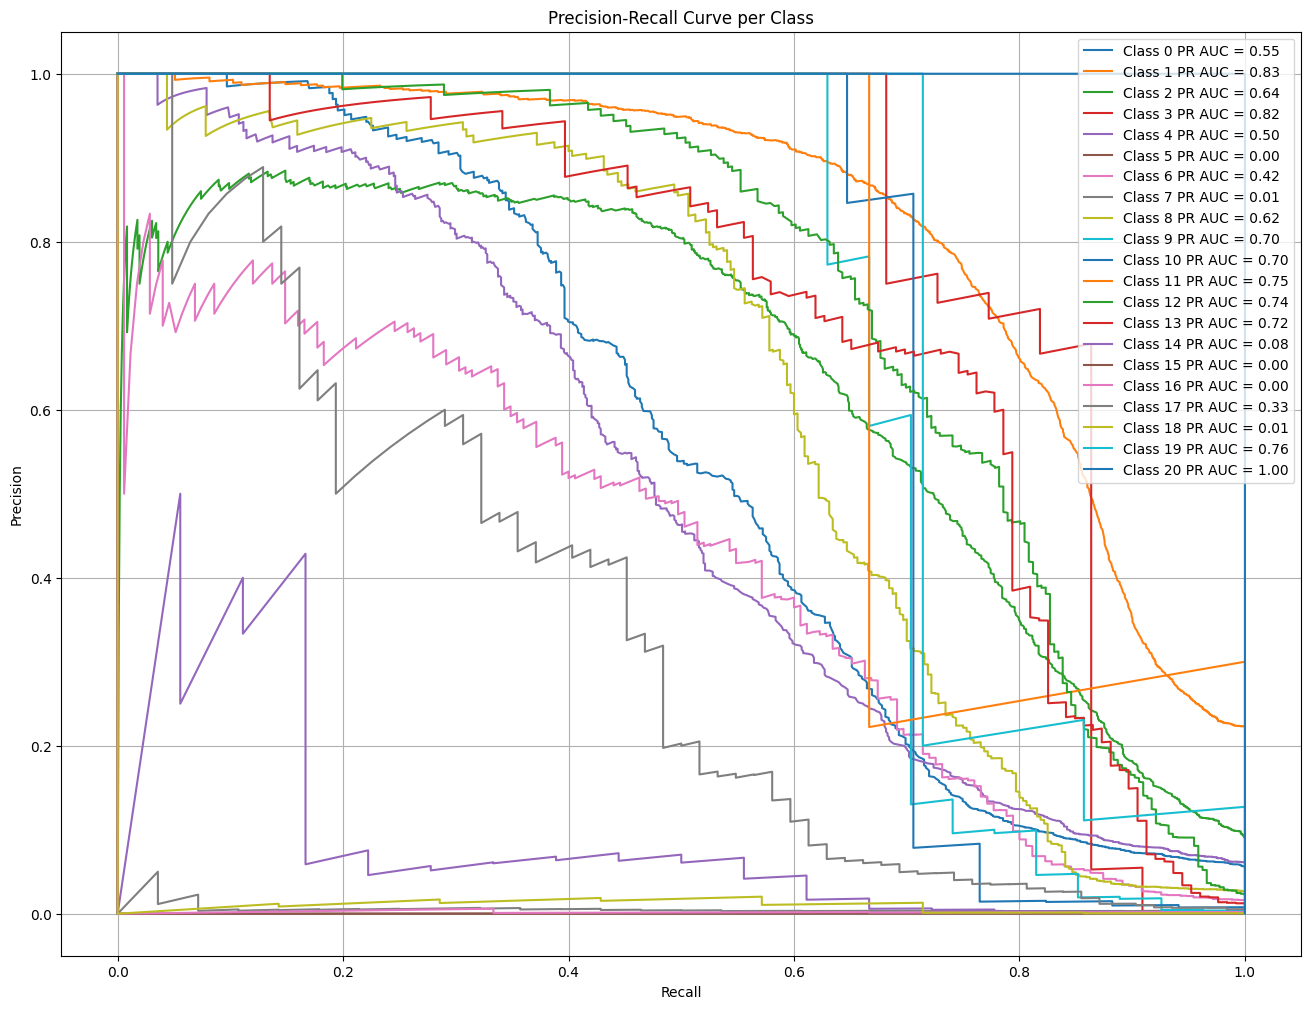

In [25]:
from uncertainbird.utils.plotting import plot_pr_curve_per_class

plot_pr_curve_per_class(predictions, targets)

<Axes: title={'center': 'Reliability Diagram ConvNeXt Masked | ECE = 2.29%'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

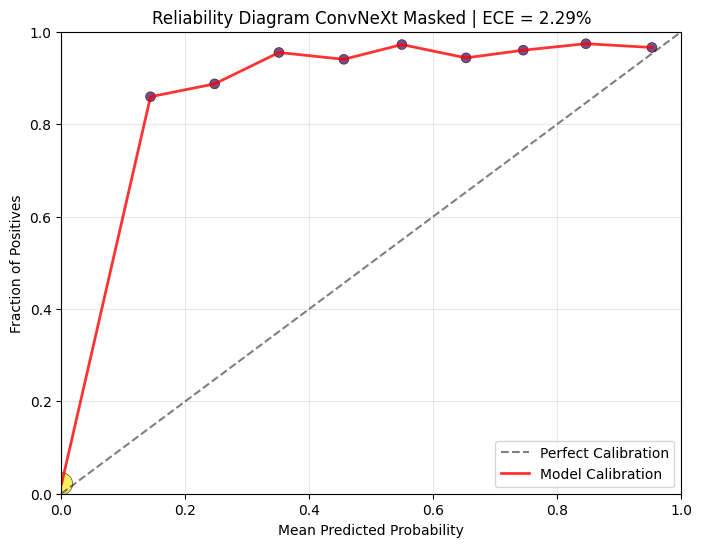

In [26]:
from uncertainbird.utils.plotting import plot_reliability_diagram

plot_reliability_diagram(
    predictions,
    targets,
    n_bins=10,
    title=f"Reliability Diagram ConvNeXt Masked | ECE = {ece*100:.2f}%",
)

Class 0: mean: 0.0046, std: 0.0545, min: 0.0000, max: 0.9990, positive samples: 266
Class 1: mean: 0.0082, std: 0.0703, min: 0.0000, max: 0.9976, positive samples: 320
Class 2: mean: 0.0010, std: 0.0209, min: 0.0000, max: 0.9966, positive samples: 22
Class 3: mean: 0.0192, std: 0.1015, min: 0.0000, max: 0.9917, positive samples: 2676
Class 4: mean: 0.0019, std: 0.0241, min: 0.0000, max: 0.9829, positive samples: 1082
ECE of top-5 predictions: tensor(0.0659)


<Axes: title={'center': 'Reliability Diagram (Top-5 Predictions) | ECE@5 = 6.59%'}, xlabel='Mean Predicted Probability', ylabel='Fraction of Positives'>

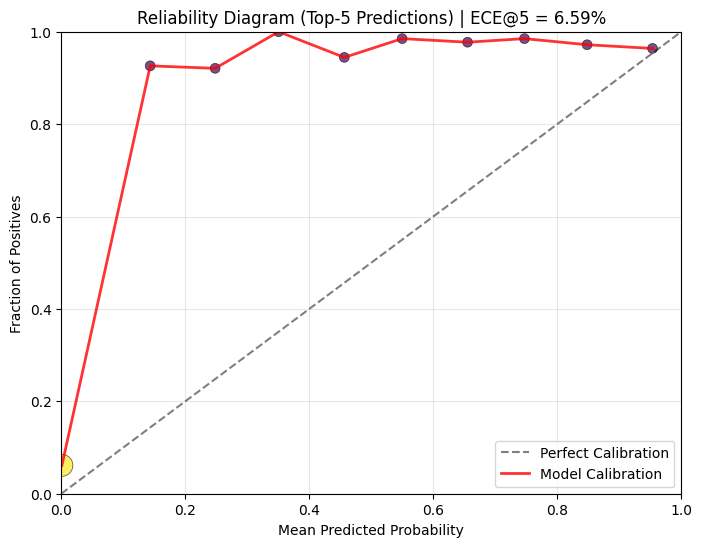

In [27]:
from uncertainbird.utils.misc import extract_top_k

top5_preds, top5_targets = extract_top_k(predictions, targets, k=5)
print_classwise_statistics(top5_preds, top5_targets)
ece_5 = TopKMultiLabelCalibrationError(k=5, n_bins=10)(top5_preds, top5_targets)
print("ECE of top-5 predictions:", ece_5)
plot_reliability_diagram(
    top5_preds,
    top5_targets,
    n_bins=10,
    title="Reliability Diagram (Top-5 Predictions) | ECE@5 = {:.2f}%".format(
        float(ece_5) * 100
    ),
)

<Axes: title={'center': 'Confidence Histogram'}, xlabel='Predicted Probability (Confidence)', ylabel='Number of Predictions (Log Scale)'>

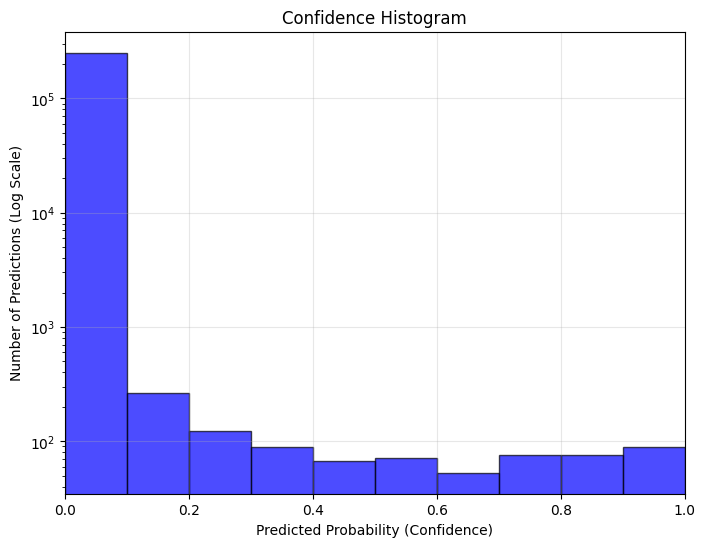

In [28]:
from uncertainbird.utils.plotting import plot_confidence_histogram

plot_confidence_histogram(predictions, n_bins=10)